# Preprocessing


In [8]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt



In [4]:
housing = pd.read_csv('../Datasets/housing.csv')

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
# Creates a training split for the data set at a given ratio (test_size) with seeding (random_state).

train_set, test_set = train_test_split(housing, test_size = .1, random_state=42)

In [ ]:
# Implementation to prevent any instances from a fresh data set such that a percentage of the new dataset that goes into the set data set without any of instances that
# where previously in the training set going into the test set.

from zlib import crc32

def is_id_in_test_set(identifier,test_ratio):
    return crc32(np.int64(identifier)) < test_ratio*2**32 

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_,test_ratio))
    return data.loc[~in_test_set],data[in_test_set]


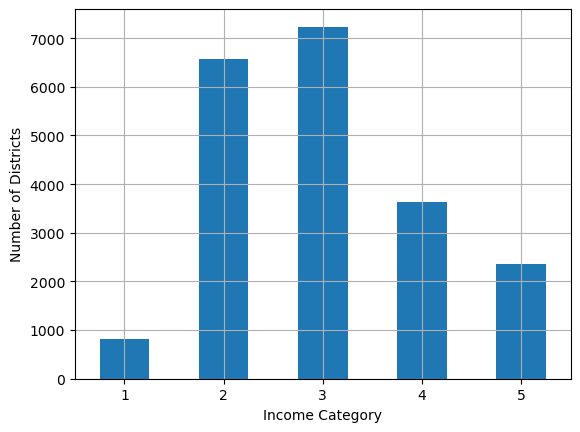

In [12]:
# Stratified simpling, i.e, to sample from certain categories of a a feature.

housing ['income_category'] = pd.cut(housing['median_income'], bins=[0.,1.5,3.0,4.5,6,np.inf],labels =[1,2,3,4,5])

# Plot histogram of income categories

housing['income_category'].value_counts().sort_index().plot.bar(rot=0,grid =True)

plt.xlabel("Income Category")
plt.ylabel("Number of Districts")
plt.show()

In [ ]:
# Creating stratified splits from the income categories

from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
for train_index, test_index in splitter.split(housing,housing['income_category']):
    strat_train_set_n = housing.iloc[train_index]
    